<a href="https://colab.research.google.com/github/SriRamK345/Retail_Sales_Forecast/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data cleaning
import pandas as pd
import numpy as np
# Visualization / EDA
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# Statistical analysis
from scipy import stats
# remove warnings
import warnings
warnings.filterwarnings("ignore")
# Split data for training and testing & Optimizing model parameters
from sklearn.model_selection import train_test_split
# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Cross validation
from sklearn.model_selection import cross_val_score
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Model selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
# performance of regression models
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
# statsmodels.api
import statsmodels.api as sm

### Import dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Final_Pro_Dataset/scaled_df.csv")
df.head()

,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,-1.219345,-1.371894,-1.215359,-1.657605,-1.417264,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.24315,0.02662,1.681679,1.260649,1.018367,0.194551,0.747976
1,-1.219345,-1.371894,-1.215359,-1.657605,-1.384487,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.24315,0.02662,1.681679,1.260649,1.018367,0.194551,1.648668
2,-1.219345,-1.371894,-1.215359,-1.657605,-1.351710,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.24315,0.02662,1.681679,1.260649,1.018367,0.194551,0.202083
3,-1.219345,-1.371894,-1.215359,-1.657605,-1.318932,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.24315,0.02662,1.681679,1.260649,1.018367,0.194551,1.312042
4,-1.219345,-1.371894,-1.215359,-1.657605,-1.286155,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.24315,0.02662,1.681679,1.260649,1.018367,0.194551,1.038675


In [3]:
df.shape

(420150, 18)

In [4]:
df.isnull().sum()

,0
Day,0
Month,0
Year,0
Store,0
Dept,0
Type,0
Size,0
IsHoliday,0
Temperature,0
Fuel_Price,0


In [5]:
df.columns

Index(['Day', 'Month', 'Year', 'Store', 'Dept', 'Type', 'Size', 'IsHoliday',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Weekly_Sales'],
      dtype='object')

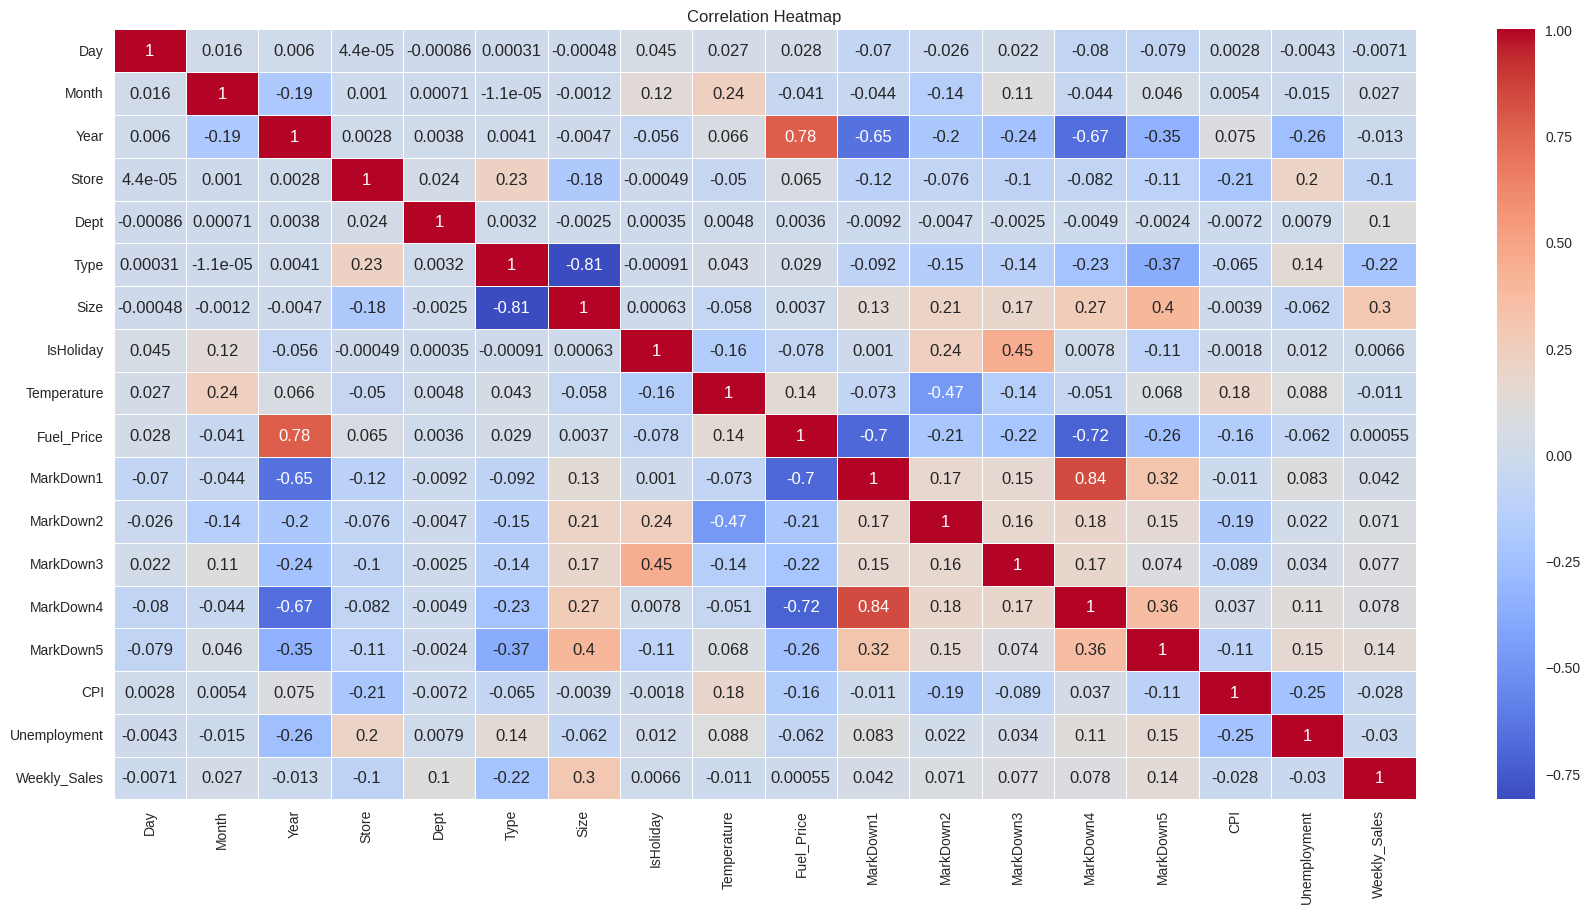

In [6]:
plt.figure(figsize=(21, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Separating Data into Test and Training Set

In [7]:
X = df.drop(["Weekly_Sales", "Day", "Month", "Year", "Fuel_Price", "IsHoliday"], axis=1)
y = df["Weekly_Sales"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
columns=X_train.columns

In [10]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 336120
X_test: 84030
y_train: 336120
y_test: 84030


### Modelling and Evaluation matrix

In [11]:
# evaluation_matrix

def evaluation_matrix(actual, pred):
  MAE = mean_absolute_error(actual, pred)
  MSE = mean_squared_error(actual, pred)
  RMSE = np.sqrt(mean_squared_error(actual, pred))
  SCORE = r2_score(actual, pred)
  return print("\n","r2_score:",SCORE , "\n","MAE:", MAE, "\n","MSE",MSE, "\n","RMSE", RMSE)

In [12]:
# cross valadiation
def evaluate_model_cv(model, X, y, cv=10):
    cv_scores = cross_val_score(estimator=model, X=X, y=y, cv=cv)
    mean_cv_score = cv_scores.mean() # Calculate the mean scores
    return mean_cv_score

## **Implementing Supervised Machine Learning algorithms**

### 1. Linear Regression

In [13]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train) # Fit the model

# Make predictions
y_pred_train = LR_model.predict(X_train)
y_pred_test = LR_model.predict(X_test) # Predicting the Test set results

# Evaluate the model
print("### Model Evaluation Results ###\n")

# Training set evaluation
print("\nTraining Set Evaluation:")
print("------------------------")
evaluation_matrix(y_train, y_pred_train)

# Testing set evaluation
print("\nTesting Set Evaluation:")
print("-----------------------")
evaluation_matrix(y_test, y_pred_test)


### Model Evaluation Results ###


Training Set Evaluation:
------------------------

 r2_score: 0.10559716200165936 
 MAE: 0.7508955761386199 
 MSE 0.8937676475630154 
 RMSE 0.945392853560368

Testing Set Evaluation:
-----------------------

 r2_score: 0.10393387449870761 
 MAE: 0.7524723319102867 
 MSE 0.8986113440008991 
 RMSE 0.9479511295424987


In [14]:
train_score_LR=LR_model.score(X_train,y_train)
train_score_LR

0.10559716200165936

In [15]:
test_score_LR=LR_model.score(X_test,y_test)
test_score_LR

0.10393387449870761

In [16]:
#storing 100 observations for analysis
simple_lr_pred = y_pred_test[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

In [17]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

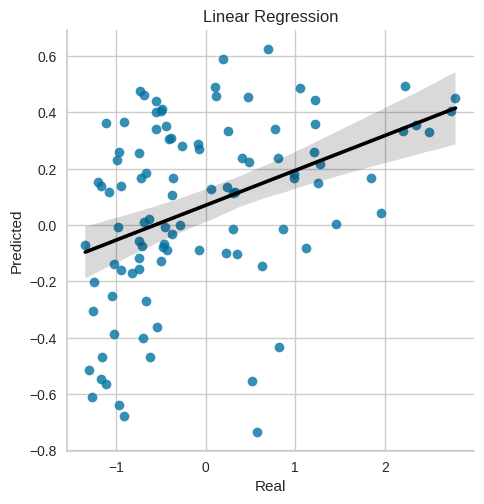

In [18]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'})
plt.title('Linear Regression')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [19]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     4119.
Date:                Fri, 02 Aug 2024   Prob (F-statistic):               0.00
Time:                        02:30:42   Log-Likelihood:            -5.7280e+05
No. Observations:              420150   AIC:                         1.146e+06
Df Residuals:                  420137   BIC:                         1.146e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.498e-16      0.001  -3.08e-13      1.000      -0.003       0.003
Store           -0.0596      0.002    -37.647      0.000      -0.063      -0.057
Dept             0.1046      0.001     71.656      0.000       0.102       0.107
Type             0.0640      0.003     24.753      0.000       0.059       0.069
Size             0.3263      0.003    125.960      0.000       0.321       0.331
Temperature      0.0129      0.002      7.489      0.000       0.010       0.016
MarkDown1       -0.0110      0.003     -3.952      0.000      -0.016      -0.006
MarkDown2        0.0030      0.002      1.714      0.087      -0.000       0.006
MarkDown3        0.0211      0.002     13.864      0.000       0.018       0.024
MarkDown4        0.0023      0.003      0.787      0.431      -0.003       0.008
MarkDown5        0.0200      0.002     11.461      0.000       0.017       0.023
CPI             -0.0371      0.002    -23.120      0.000      -0.040      -0.034
Unemployment    -0.0203      0.002    -12.726      0.000      -0.023      -0.017
==============================================================================
Omnibus:                    46259.265   Durbin-Watson:                   1.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64114.004
Skew:                           0.882   Prob(JB):                         0.00
Kurtosis:                       3.741   Cond. No.                         4.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Decision TreeRegressor

In [20]:
DT_model = DecisionTreeRegressor(max_depth=5)
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)
evaluation_matrix(y_test, y_pred)


 r2_score: 0.5131990343446531 
 MAE: 0.5266505577570533 
 MSE 0.4881836926529994 
 RMSE 0.6987014331264817


In [21]:
train_score_DT=DT_model.score(X_train,y_train)
train_score_DT

0.5170487376644753

In [22]:
test_score_DT=DT_model.score(X_test,y_test)
test_score_DT

0.5131990343446531

In [23]:
# Cross Validation score
evaluate_model_cv(DT_model, X_train, y_train, cv=10)

0.5169447875050672

In [24]:
evaluate_model_cv(DT_model, X_test, y_test, cv=10)

0.5104843901710023

### 3. RandomForestRegressor

In [25]:
RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

In [26]:
evaluation_matrix(y_test, y_pred)


 r2_score: 0.9684946879972774 
 MAE: 0.09747139867720651 
 MSE 0.031594800825771624 
 RMSE 0.1777492639246971


In [29]:
train_score_RF=RF_model.score(X_train,y_train)
train_score_RF

0.9955245129998278

In [30]:
test_score_RF=RF_model.score(X_test,y_test)
test_score_RF

0.9684946879972774

In [ ]:
evaluate_model_cv(RF_model, X_train, y_train, cv=5)

In [112]:
evaluate_model_cv(RF_model, X_test, y_test, cv=5)

0.9538732364196504

In [31]:
my_dist = {"Actual" : y_test , "Predict" : y_pred}
compare = pd.DataFrame(my_dist)

In [32]:
compare.sample(10)

,Actual,Predict
355951,-1.286335,-1.264169
109937,-0.061328,-0.050814
376410,0.749210,0.574717
189402,2.622011,2.809686
170974,0.473671,0.209006
384046,-1.083509,-1.055780
50945,0.199654,0.774260
398424,0.718379,0.487011
23210,-0.501272,-0.464290
123115,-0.876270,-0.955667


## We could see that the Actual, Prediction values are approximately closed to each other and there is no such significant variation.

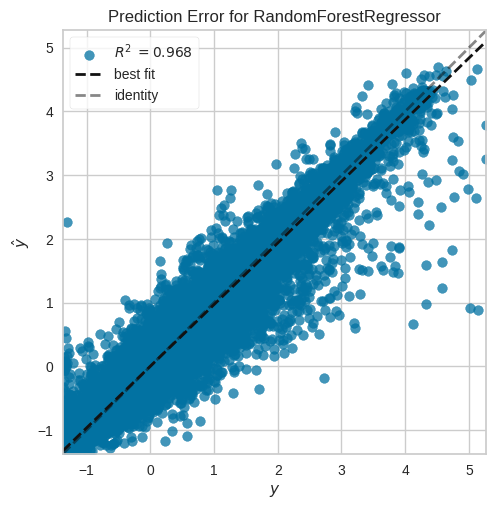

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [27]:
visualizer = PredictionError(RF_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

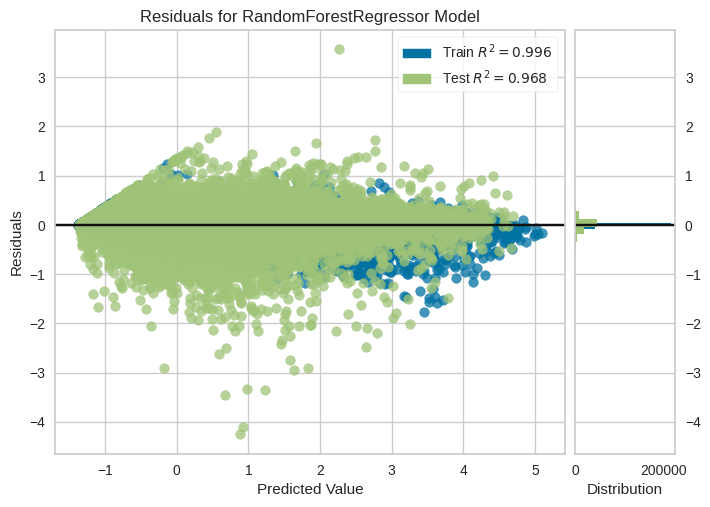

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [28]:
visualizer = ResidualsPlot(RF_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

**Random Forest With Hyper Parameter Tuning**

In [109]:
# #another script that takes toooo long, to find the right parameters for RFR
# RF_mod=RandomForestRegressor()

# params = {
#          'n_estimators':[40,50,60,70,80,90],
#          'min_samples_split':[2,3,6,8],
#          'min_samples_leaf':[1,2,3,4],
#          'max_depth':[None,5,15,30]
#          }

# #the dimensionality is high, the number of combinations we have to search is enormous, using RandomizedSearchCV is a better option then GridSearchCV
# grid_cv = RandomizedSearchCV(estimator=RF_mod, param_distributions=params, n_iter=20, verbose=True, cv=10)
# grid_cv.fit(X_train, y_train)
# grid_cv.best_params_

### 4. XGBRegressor

In [33]:
from xgboost import XGBRegressor
XGB_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
evaluation_matrix(y_test, y_pred)


 r2_score: 0.9114393173504974 
 MAE: 0.203967827667695 
 MSE 0.08881223360249861 
 RMSE 0.2980138144490933


In [34]:
train_score_XGB= XGB_model.score(X_train,y_train)
train_score_XGB

0.9131016203661798

In [35]:
test_score_XGB= XGB_model.score(X_test,y_test)
test_score_XGB

0.9114393173504974

In [36]:
evaluate_model_cv(XGB_model, X_train, y_train, cv=10)

0.9126976635127116

In [37]:
evaluate_model_cv(XGB_model, X_test, y_test, cv=10)

0.9109395439395248

### 5. ExtraTreesRegressor

In [38]:
ET_model=ExtraTreesRegressor()
ET_model.fit(X_train,y_train)
y_pred = ET_model.predict(X_test)
evaluation_matrix(y_test, y_pred)


 r2_score: 0.9700189182619909 
 MAE: 0.09578525250246787 
 MSE 0.030066241082510697 
 RMSE 0.17339619685134589


In [39]:
train_score_ET= ET_model.score(X_train,y_train)
train_score_ET

1.0

In [40]:
test_score_ET= ET_model.score(X_test,y_test)
test_score_ET

0.9700189182619909

In [ ]:
evaluate_model_cv(ET_model, X_train, y_train, cv=5)

In [ ]:
evaluate_model_cv(ET_model, X_test, y_test, cv=5)

In [41]:
my_dist = {"Actual" : y_test , "Predict" : y_pred}
compare = pd.DataFrame(my_dist)
compare.sample(10)

,Actual,Predict
34188,1.006914,0.968981
59738,-0.377013,-0.363771
89165,2.437780,2.437412
356108,-1.335023,-1.341346
147665,0.348800,0.288752
276640,-0.678172,-0.528365
30922,0.610842,0.611097
239171,0.524943,0.583722
47186,-0.458345,-0.428524
321968,0.743553,0.780856


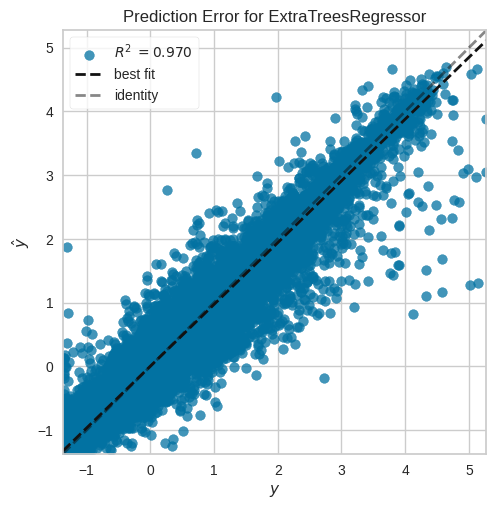

<Axes: title={'center': 'Prediction Error for ExtraTreesRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [42]:
visualizer = PredictionError(ET_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

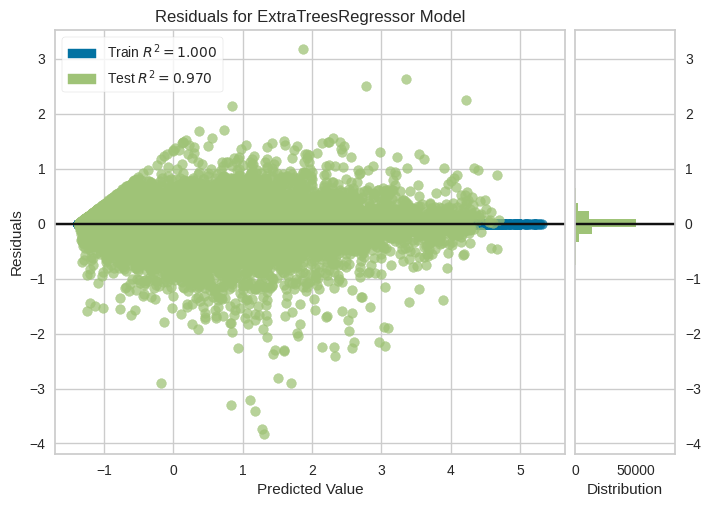

<Axes: title={'center': 'Residuals for ExtraTreesRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [43]:
visualizer = ResidualsPlot(ET_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

**ExtraTreesRegressor With Hyper Parameter Tuning**

In [ ]:
# ETR_model = ExtraTreesRegressor()

# # Define the hyperparameters and the range of values to search
# params = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False],
#     'criterion': ['mse', 'mae']}

# grid_cv = RandomizedSearchCV(estimator=ETR_model,param_distributions=params,n_iter=100,cv=5, verbose=2,random_state=42,n_jobs=-1)

# Fit the model on the training data
# grid_cv.fit(X_train, y_train)
# grid_cv.fit(X_train, y_train)
# grid_cv.best_params_

In [35]:
#import pickle

# Save the model to a file
#with open('RF_model.pkl', 'wb') as file:
#    pickle.dump(RF_model, file)

In [44]:
def feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

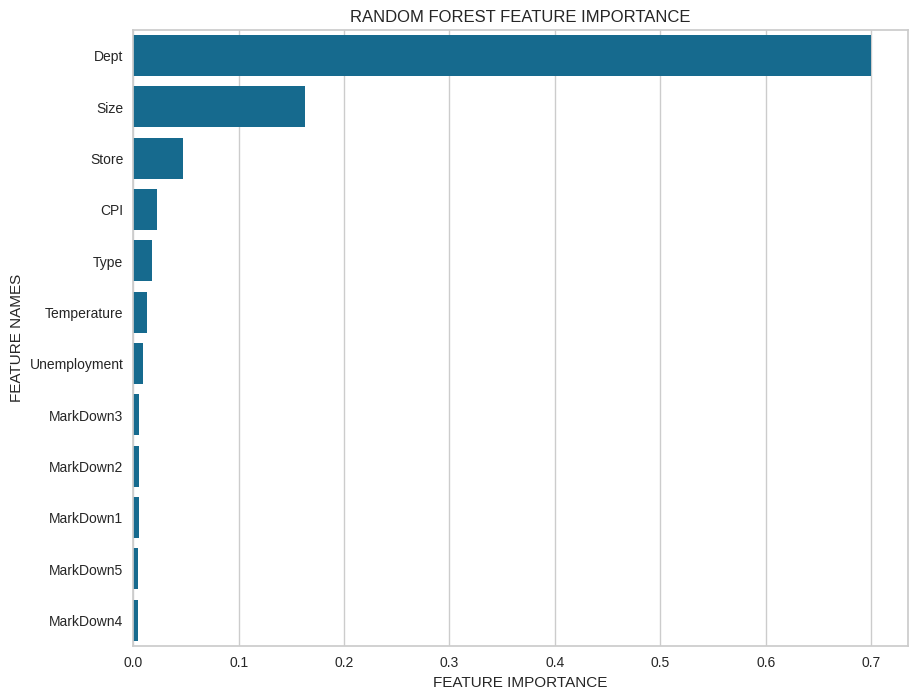

In [45]:
feature_importance(RF_model.feature_importances_,columns[:],'RANDOM FOREST')

**Dept, Size, Store these three bars most important features in our sales prediction.**

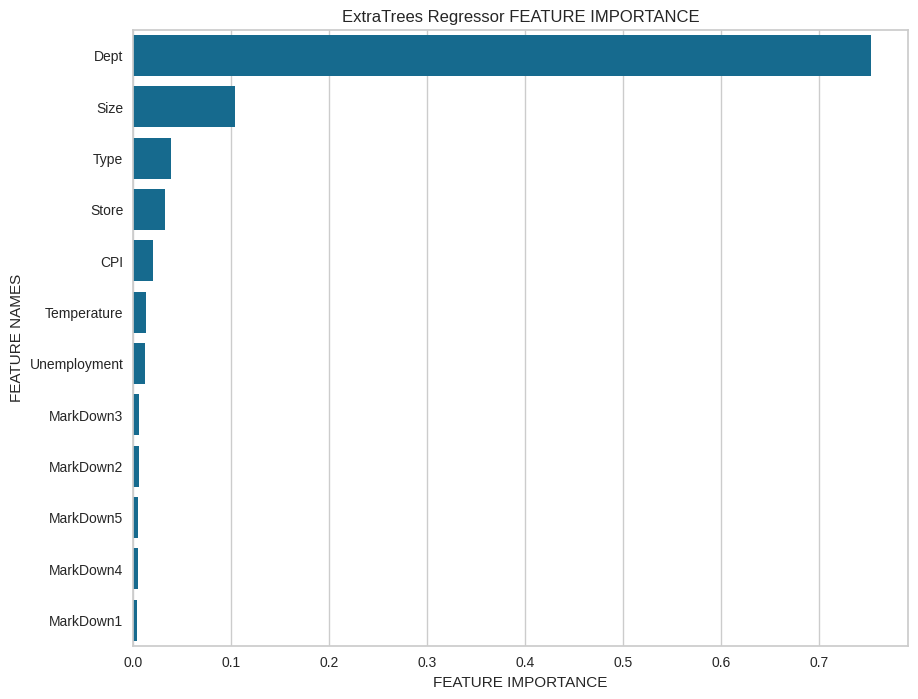

In [46]:
feature_importance(ET_model.feature_importances_,columns[:],'ExtraTrees Regressor')

**Dept, Size, type, Store these four bars most important features in our sales prediction accorging to ExtraTreesRegressor.**

In [47]:
score_df = pd.DataFrame({'Train_Score':[train_score_LR,train_score_DT,train_score_RF,train_score_XGB,train_score_ET],
                         'Test_Score':[test_score_LR,test_score_DT,test_score_RF,test_score_XGB,test_score_ET]},
                        index=['Linear Regression','Decision Tree','Random Forest Regression','XGBoost Regression','ExtraTreesRegressor'],)

In [48]:
score_df

,Train_Score,Test_Score
Linear Regression,0.105597,0.103934
Decision Tree,0.517049,0.513199
Random Forest Regression,0.995525,0.968495
XGBoost Regression,0.913102,0.911439
ExtraTreesRegressor,1.000000,0.970019


## **Conclusion**
**The ExtraTreesRegressor (ET_model) performs slightly better overall based on the evaluation metrics provided. It has a marginally higher R² score and lower values for MAE, MSE, and RMSE compared to the RandomForestRegressor (RF_model). Therefore, ET_model is the preferred model among the two based on these performance metrics.**